<a href="https://colab.research.google.com/github/emiiggm/econometria/blob/main/Copia_de_05_ECO_Prediccion_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Predicción puntual e intervalos de confianza


In [ ]:

# --- Importación de librerías ---
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from IPython.display import display


# Ajustes generales
pd.set_option('display.float_format', '{:,.3f}'.format)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Cargar datos

In [ ]:

# Cargar CSV
data = pd.read_csv("/content/drive/MyDrive/Econometria/forestfires2.csv")

# Revisar estructura
data.info()
display(data.head())


print("Dimensiones:", data.shape)
display(data.head())

# Variable dependiente
y = np.log(data['area'] + 1)  # log(area+1) para reducir sesgo

# Variables explicativas
X = data[['temp', 'RH', 'wind', 'rain', 'FFMC', 'DMC', 'DC', 'ISI']]

# constante
X = sm.add_constant(X)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.200,26.200,94.300,5.100,8.200,51,6.700,0.000,0.000
1,7,4,oct,tue,90.600,35.400,669.100,6.700,18.000,33,0.900,0.000,0.000
2,7,4,oct,sat,90.600,43.700,686.900,6.700,14.600,33,1.300,0.000,0.000
3,8,6,mar,fri,91.700,33.300,77.500,9.000,8.300,97,4.000,0.200,0.000
4,8,6,mar,sun,89.300,51.300,102.200,9.600,11.400,99,1.800,0.000,0.000


Dimensiones: (517, 13)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.200,26.200,94.300,5.100,8.200,51,6.700,0.000,0.000
1,7,4,oct,tue,90.600,35.400,669.100,6.700,18.000,33,0.900,0.000,0.000
2,7,4,oct,sat,90.600,43.700,686.900,6.700,14.600,33,1.300,0.000,0.000
3,8,6,mar,fri,91.700,33.300,77.500,9.000,8.300,97,4.000,0.200,0.000
4,8,6,mar,sun,89.300,51.300,102.200,9.600,11.400,99,1.800,0.000,0.000


## Ajuste del modelo OLS

In [ ]:

modelo = sm.OLS(y, X).fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.288
Date:                Mon, 15 Dec 2025   Prob (F-statistic):              0.247
Time:                        08:41:34   Log-Likelihood:                -901.28
No. Observations:                 517   AIC:                             1821.
Df Residuals:                     508   BIC:                             1859.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2224      1.360      0.163      0.8

## Predicción e intervalos

In [ ]:

# Seleccionamos, por ejemplo, las 3 primeras filas para ilustrar
X_pred = X.iloc[:3]
predicciones = modelo.get_prediction(X_pred)
pred_summary = predicciones.summary_frame(alpha=0.05)  # 95%

print("Predicciones y bandas (95%):")
display(pred_summary)

# Columnas:
# - mean: predicción puntual del valor esperado E[Y|X]
# - mean_ci_lower, mean_ci_upper: IC para el valor esperado
# - obs_ci_lower, obs_ci_upper: intervalo de predicción puntual


Predicciones y bandas (95%):


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1.086,0.160,0.772,1.399,-1.673,3.845
1,0.927,0.181,0.572,1.283,-1.837,3.692
2,0.964,0.193,0.584,1.344,-1.803,3.732


## Visualización de la incertidumbre

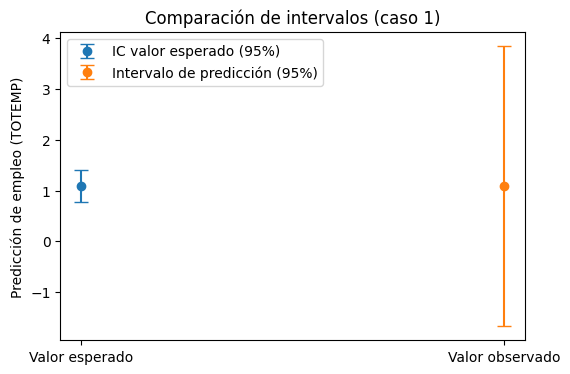

In [ ]:

# Elegimos el primer caso para graficar
i = pred_summary.index[0]
mean_pred = pred_summary.loc[i, 'mean']
mean_ci_low = pred_summary.loc[i, 'mean_ci_lower']
mean_ci_up  = pred_summary.loc[i, 'mean_ci_upper']
obs_ci_low  = pred_summary.loc[i, 'obs_ci_lower']
obs_ci_up   = pred_summary.loc[i, 'obs_ci_upper']

plt.figure(figsize=(6,4))

# IC del valor esperado
plt.errorbar(x=['Valor esperado'], y=[mean_pred],
             yerr=[[mean_pred - mean_ci_low], [mean_ci_up - mean_pred]],
             fmt='o', capsize=5, label='IC valor esperado (95%)')

# Intervalo de predicción (valor individual futuro)
plt.errorbar(x=['Valor observado'], y=[mean_pred],
             yerr=[[mean_pred - obs_ci_low], [obs_ci_up - mean_pred]],
             fmt='o', capsize=5, label='Intervalo de predicción (95%)')

plt.title("Comparación de intervalos (caso 1)")
plt.ylabel("Predicción de empleo (TOTEMP)")
plt.legend()
plt.show()


## Predicción para nuevos datos

In [ ]:

nuevo_X = pd.DataFrame({
    'const': [1.0],
    'temp': [30.0],
    'RH': [40.0],
    'wind': [10.0],
    'rain': [0.0],
    'FFMC': [85.0],
    'DMC': [100.0],
    'DC': [300.0],
    'ISI': [12.0]
})

pred_nuevo = modelo.get_prediction(nuevo_X).summary_frame(alpha=0.05)
print("Predicción log(area+1) para un nuevo incendio (95%):")
display(pred_nuevo)

# Si quieres obtener área original:
pred_nuevo['area_pred'] = np.exp(pred_nuevo['mean']) - 1
display(pred_nuevo[['area_pred','mean_ci_lower','mean_ci_upper']])


Predicción log(area+1) para un nuevo incendio (95%):


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1.416,0.338,0.752,2.080,-1.404,4.237


,area_pred,mean_ci_lower,mean_ci_upper
0,3.121,0.752,2.080



## Visualización comparativa global de bandas (valor esperado vs. predicción)

En esta sección representamos, para **todas** las observaciones, la predicción puntual, el **IC del valor esperado** y el **intervalo de predicción**.  
Ordenamos por YEAR para facilitar la lectura temporal.


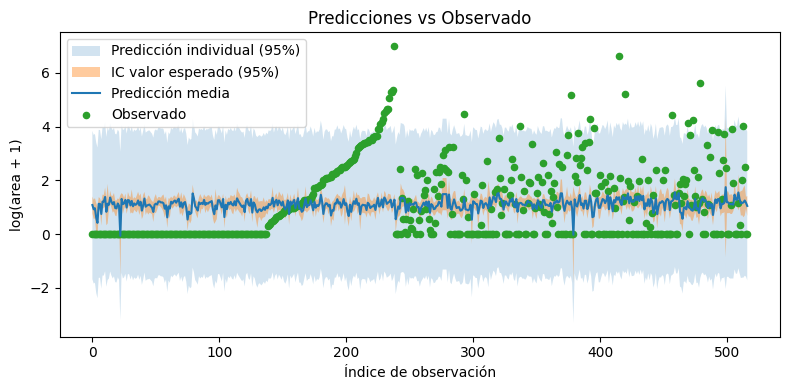

In [ ]:
# Predicciones
pred_all = modelo.get_prediction(X).summary_frame(alpha=0.05).copy()

viz = pred_all.copy()
viz['obs'] = y.values
viz['index'] = range(len(y))  # eje horizontal por índice
viz = viz.sort_values('index').reset_index(drop=True)

plt.figure(figsize=(8,4))

plt.fill_between(viz['index'], viz['obs_ci_lower'], viz['obs_ci_upper'], alpha=0.2, label='Predicción individual (95%)')
plt.fill_between(viz['index'], viz['mean_ci_lower'], viz['mean_ci_upper'], alpha=0.4, label='IC valor esperado (95%)')
plt.plot(viz['index'], viz['mean'], label='Predicción media')
plt.scatter(viz['index'], viz['obs'], s=20, label='Observado')

plt.xlabel('Índice de observación')
plt.ylabel('log(area + 1)')
plt.title('Predicciones vs Observado')
plt.legend()
plt.tight_layout()
plt.show()

plt.show()
